In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from sys import platform
import numpy as np
import seaborn as sns
import pandas as pd
from jupyterthemes import jtplot
import matplotlib.pyplot as plt



jtplot.style(theme='grade3', context='poster', fscale=2, spines=False, gridlines='--')
sns.set_color_codes("muted")

In [3]:
if platform == 'linux2':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/67981492/'

In [4]:
subj_df_all = pd.read_csv(home + 'Dropbox/loki_0.5/analysis/aggregated_data/subjectwise_ddm_reg.csv')
subj_dics_all = pd.read_csv(home + 'Dropbox/loki_0.5/analysis/aggregated_data/subjectwise_dics_reg.csv' )

In [5]:
subj_df_all.drop(columns=['Unnamed: 0'], inplace=True)
subj_dics_all.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
subj_df = subj_df_all.loc[subj_df_all.model == 'a_cpp_v_B'] # get the traces from the winning model
subj_dics = subj_dics_all.loc[(subj_dics_all.model == 'a_cpp_v_B') | (subj_dics_all.model == 'v_cpp_a_B')].reset_index(drop=True) # get the dics for the models compared

In [7]:
subj_df.head()

,a,a_Intercept,a_cpp_shifted,a_ideal_B_shifted,dic,model,subj_idx,t,t_Intercept,v,v_Intercept,v_cpp_shifted,v_ideal_B_shifted
0,NaN,1.593968,0.013742,NaN,5496.641225,a_cpp_v_B,786,0.000492,NaN,NaN,0.189651,NaN,0.233044
1,NaN,1.593056,0.061873,NaN,5496.641225,a_cpp_v_B,786,0.001322,NaN,NaN,0.205856,NaN,0.223747
2,NaN,1.591611,0.042420,NaN,5496.641225,a_cpp_v_B,786,0.001123,NaN,NaN,0.229877,NaN,0.213089
3,NaN,1.598670,-0.065818,NaN,5496.641225,a_cpp_v_B,786,0.000980,NaN,NaN,0.228464,NaN,0.185507
4,NaN,1.616312,-0.088377,NaN,5496.641225,a_cpp_v_B,786,0.000802,NaN,NaN,0.220422,NaN,0.192042


In [8]:
subj_dics.head()

,subj_idx,model,null_adj_dic,raw_dic
0,786,a_cpp_v_B,-113.784050,5496.641225
1,786,v_cpp_a_B,-14.433934,5595.991341
2,787,a_cpp_v_B,-42.348536,5392.700417
3,787,v_cpp_a_B,-22.788774,5412.260179
4,788,a_cpp_v_B,-9.417553,3157.521296


In [9]:
np.round(np.std(subj_df.groupby('subj_idx').v_ideal_B_shifted.apply(lambda x: (x > 0).mean())),3)

0.005

In [10]:
a_cpp_dir_hyp = np.round(subj_df.groupby('subj_idx').a_cpp_shifted.apply(lambda x: (x < 0).mean()),
3)

In [11]:
a_cpp_dir_mag = np.round(subj_df.groupby('subj_idx').a_cpp_shifted.mean(),
                                3)

In [12]:
v_B_dir_hyp = np.round(subj_df.groupby('subj_idx').v_ideal_B_shifted.apply(lambda x: (x < 0).mean()),
3)

In [13]:
v_B_dir_mag = np.round(subj_df.groupby('subj_idx').v_ideal_B_shifted.mean(),
                                3)

In [14]:
v_B_dir_hyp

subj_idx
786    0.000
787    0.000
788    0.000
789    0.011
Name: v_ideal_B_shifted, dtype: float64

In [95]:
np.round(np.mean(v_B_dir_hyp),3)

0.003

In [96]:
np.round(np.std(v_B_dir_hyp),3)

0.005

In [94]:
v_B_dir_mag

subj_idx
786    0.204
787    0.124
788    0.077
789    0.042
Name: v_ideal_B_shifted, dtype: float64

In [97]:
np.round(np.mean(v_B_dir_mag),3)

0.112

In [98]:
np.round(np.std(v_B_dir_mag),3)

0.061

In [86]:
a_cpp_dir_mag

subj_idx
786   -0.025
787   -0.033
788   -0.066
789   -0.023
Name: a_cpp_shifted, dtype: float64

In [88]:
np.round(np.mean(a_cpp_dir_mag),3)

-0.037

In [90]:
np.round(np.std(a_cpp_dir_mag),3)

0.017

In [80]:
np.mean(a_cpp_dir_mag

subj_idx
786   -0.025
787   -0.033
788   -0.066
789   -0.023
Name: a_cpp_shifted, dtype: float64

In [77]:
np.round(np.std(a_cpp_dir_hyp),3)

0.108

In [74]:
np.round(np.mean(a_cpp_dir_hyp),3)

0.727

In [60]:
np.round(np.mean(subj_df.groupby('subj_idx').v_ideal_B_shifted.apply(lambda x: (x < 0).mean())),3)

0.003

In [19]:
subj_df.groupby(['subj_idx'])['v_ideal_B_shifted', 'a_cpp_shifted'].mean()

,v_ideal_B_shifted,a_cpp_shifted
subj_idx,,
786,0.203685,-0.025444
787,0.124453,-0.033487
788,0.076557,-0.066079
789,0.042461,-0.023310


In [42]:
beta_means = subj_df.groupby(['subj_idx'])['v_ideal_B_shifted', 'a_cpp_shifted'].mean()

In [45]:
np.round(np.mean(beta_means),3)

v_ideal_B_shifted    0.112
a_cpp_shifted       -0.037
dtype: float64

In [18]:
subj_df.groupby(['subj_idx']).v_ideal_B_shifted.std()

subj_idx
786    0.019160
787    0.017879
788    0.021968
789    0.018501
Name: v_ideal_B_shifted, dtype: float64

In [32]:
a_cpp_cis = []
v_B_cis = []


for sub in subj_df.subj_idx.unique():
    dat = subj_df.loc[subj_df.subj_idx == sub]
    a_cpp_ci = np.percentile(dat.a_cpp_shifted, [0.025, .975])
    v_B_ci = np.percentile(dat.v_ideal_B_shifted, [0.025, .975])


    
    a_cpp_cis.append(a_cpp_ci)
    v_B_cis.append(v_B_ci)



In [33]:
a_cpp_cis

[array([-0.21645775, -0.16947737]),
 array([-0.22012485, -0.17489687]),
 array([-0.21110145, -0.17478335]),
 array([-0.21828403, -0.16333023])]

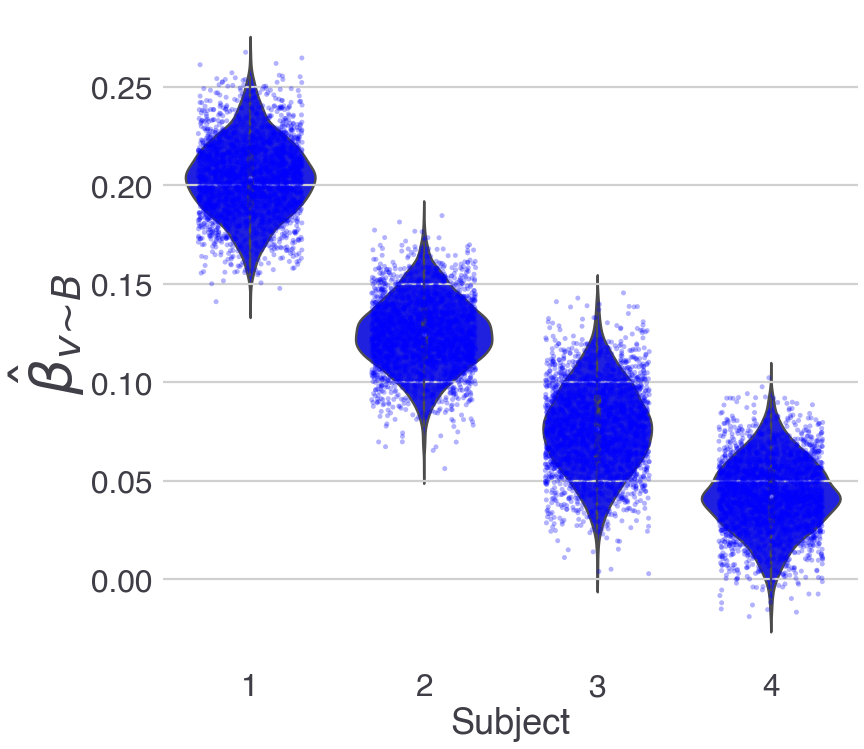

In [15]:
jtplot.style(context='poster', fscale=3, spines=False, theme='grade3')
sns.set_color_codes("muted")

sns.violinplot(x='subj_idx', y='v_ideal_B_shifted', data=subj_df, color='blue')
sns.stripplot(x='subj_idx', y='v_ideal_B_shifted', data=subj_df, alpha=0.3, jitter=0.30, color='blue')
# plt.ylabel(r'$v \textasciitilde B$')
plt.ylabel(r'$\hat\beta_{v\textasciitilde B}$',fontsize='xx-large')


plt.xlabel('Subject')
plt.xticks(np.arange(4), np.arange(1,5))
plt.tight_layout()
# plt.savefig(home+'Dropbox/loki_0.5/analysis/figures/subj_vB_betas_v2.pdf',dpi=300) #add rotated labels

In [16]:
jtplot.style(context='poster', fscale=3, spines=False, theme='grade3')
sns.set_color_codes("muted")

sns.violinplot(x='subj_idx', y='a_cpp_shifted', data=subj_df, '')
sns.stripplot(x='subj_idx', y='a_cpp_shifted', data=subj_df, alpha=0.3, jitter=0.30)
# plt.ylabel(r'$a \textasciitilde \Omega$')
plt.ylabel(r'$\hat\beta_{a\textasciitilde \Omega}$',fontsize='xx-large')
plt.xticks(np.arange(4), np.arange(1,5))
plt.xlabel('Subject')
plt.tight_layout()
# plt.savefig(home+'Dropbox/loki_0.5/analysis/figures/subj_aCPP_betas_v2.pdf',dpi=300) #add rotated labels

SyntaxError: positional argument follows keyword argument (<ipython-input-16-53ac4abd257c>, line 4)

In [23]:
formatted_model_names = [r'$a\textasciitilde\Omega + v\textasciitilde B$', r'$a\textasciitilde B + v\textasciitilde\Omega$']
model_names = ['a_cpp_v_B', 'v_cpp_a_B']
model_order = model_names

In [24]:
subj_dics

,subj_idx,model,null_adj_dic,raw_dic
0,786,a_cpp_v_B,-113.784050,5496.641225
1,786,v_cpp_a_B,-14.433934,5595.991341
2,787,a_cpp_v_B,-42.348536,5392.700417
3,787,v_cpp_a_B,-22.788774,5412.260179
4,788,a_cpp_v_B,-9.417553,3157.521296
5,788,v_cpp_a_B,-4.204535,3162.734314
6,789,a_cpp_v_B,-1.252555,5456.290871
7,789,v_cpp_a_B,1.629079,5459.172505


In [25]:
subj_dics['subject_num'] = np.repeat(np.arange(1,5),2)

In [26]:
print(subj_dics)

   subj_idx      model  null_adj_dic      raw_dic  subject_num
0       786  a_cpp_v_B   -113.784050  5496.641225            1
1       786  v_cpp_a_B    -14.433934  5595.991341            1
2       787  a_cpp_v_B    -42.348536  5392.700417            2
3       787  v_cpp_a_B    -22.788774  5412.260179            2
4       788  a_cpp_v_B     -9.417553  3157.521296            3
5       788  v_cpp_a_B     -4.204535  3162.734314            3
6       789  a_cpp_v_B     -1.252555  5456.290871            4
7       789  v_cpp_a_B      1.629079  5459.172505            4


In [27]:
subj_dics.groupby(['model', 'subject_num']).null_adj_dic.mean()

model      subject_num
a_cpp_v_B  1             -113.784050
           2              -42.348536
           3               -9.417553
           4               -1.252555
v_cpp_a_B  1              -14.433934
           2              -22.788774
           3               -4.204535
           4                1.629079
Name: null_adj_dic, dtype: float64

In [28]:
# find the model with the lowest null-adjusted dic score for each subject
subj_dics.iloc[subj_dics.groupby(['subject_num']).null_adj_dic.idxmin()].model

0    a_cpp_v_B
2    a_cpp_v_B
4    a_cpp_v_B
6    a_cpp_v_B
Name: model, dtype: object

In [29]:
subj_dics.groupby(['model', 'subject_num']).null_adj_dic.mean().round(1).reset_index()

,model,subject_num,null_adj_dic
0,a_cpp_v_B,1,-113.8
1,a_cpp_v_B,2,-42.3
2,a_cpp_v_B,3,-9.4
3,a_cpp_v_B,4,-1.3
4,v_cpp_a_B,1,-14.4
5,v_cpp_a_B,2,-22.8
6,v_cpp_a_B,3,-4.2
7,v_cpp_a_B,4,1.6


In [30]:
subj_dics.groupby(['model', 'subject_num']).raw_dic.mean().round(1).reset_index()

,model,subject_num,raw_dic
0,a_cpp_v_B,1,5496.6
1,a_cpp_v_B,2,5392.7
2,a_cpp_v_B,3,3157.5
3,a_cpp_v_B,4,5456.3
4,v_cpp_a_B,1,5596.0
5,v_cpp_a_B,2,5412.3
6,v_cpp_a_B,3,3162.7
7,v_cpp_a_B,4,5459.2


In [32]:
for s in subj_dics.subject_num.unique(): 
    
    sub_data = subj_dics.loc[subj_dics.subject_num == s].reset_index()
    
    best_model = sub_data.iloc[sub_data.null_adj_dic.idxmin()].model
    assert best_model == 'a_cpp_v_B', 'check best model'
    
    best_model_dic = sub_data.loc[sub_data.model == 'a_cpp_v_B'].null_adj_dic.values
    print('subject', s,  'model dic - ', best_model, 'dic \n', (sub_data.null_adj_dic - best_model_dic).round(1))

subject 1 model dic -  a_cpp_v_B dic 
 0     0.0
1    99.4
Name: null_adj_dic, dtype: float64
subject 2 model dic -  a_cpp_v_B dic 
 0     0.0
1    19.6
Name: null_adj_dic, dtype: float64
subject 3 model dic -  a_cpp_v_B dic 
 0    0.0
1    5.2
Name: null_adj_dic, dtype: float64
subject 4 model dic -  a_cpp_v_B dic 
 0    0.0
1    2.9
Name: null_adj_dic, dtype: float64


(-100, 0)

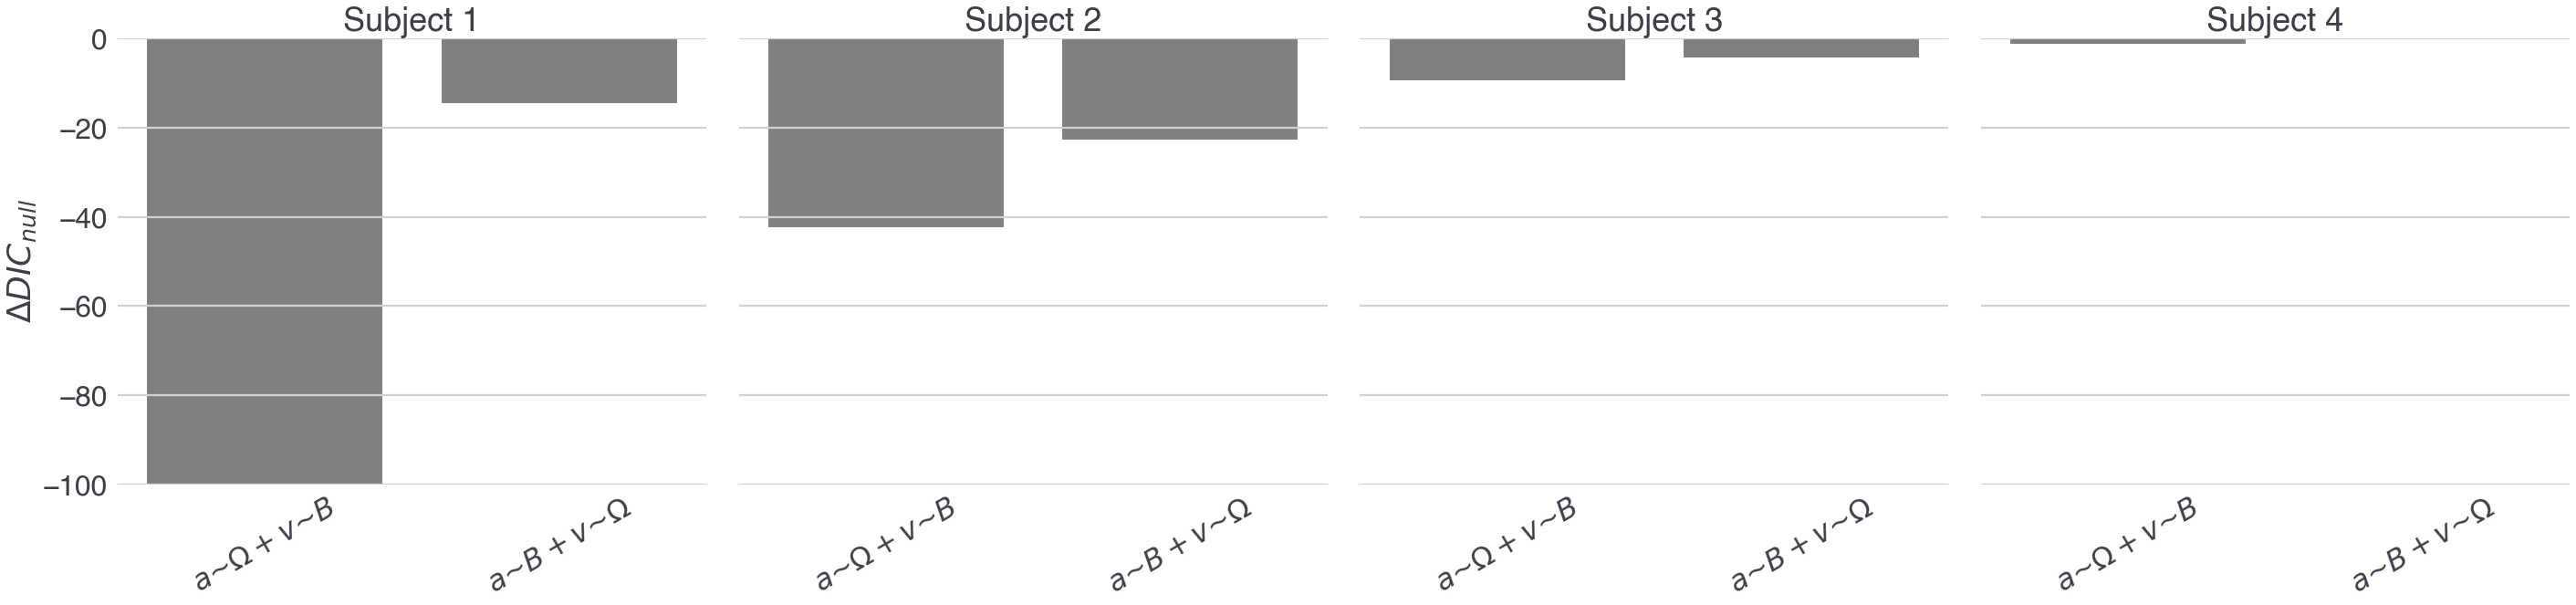

In [33]:
g = sns.FacetGrid(subj_dics, col='subject_num', height=10)
(g.map(sns.barplot, "model", "null_adj_dic", order=model_order, color='gray').set_titles('Subject {col_name}'))
g.set_ylabels(r'$\Delta DIC_{null}$')
g.set_xticklabels(labels=formatted_model_names, rotation=30)
g.set_xlabels('')
plt.tight_layout()
plt.ylim([-100,0])
# plt.savefig(home+'Dropbox/loki_0.5/analysis/figures/subj_model_comparison_v2.pdf',dpi=300)